In [92]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import umap
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import umap
import seaborn as sns
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

sys.path.append(os.path.abspath('..')) 

from utils.preproc_utils import *
from utils.plot_utils import *
from utils.modeling_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
sys.path.append(os.path.abspath('..')) 
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/processed/'))

latent_rep_path = os.path.join(base_dir, 'latent_representation.csv')
latent_rep = pd.read_csv(latent_rep_path, index_col='customer_id')

latent_rep_path_outliers = os.path.join(base_dir, 'latent_representation_outliers.csv')
latent_rep_outliers = pd.read_csv(latent_rep_path_outliers, index_col='customer_id')

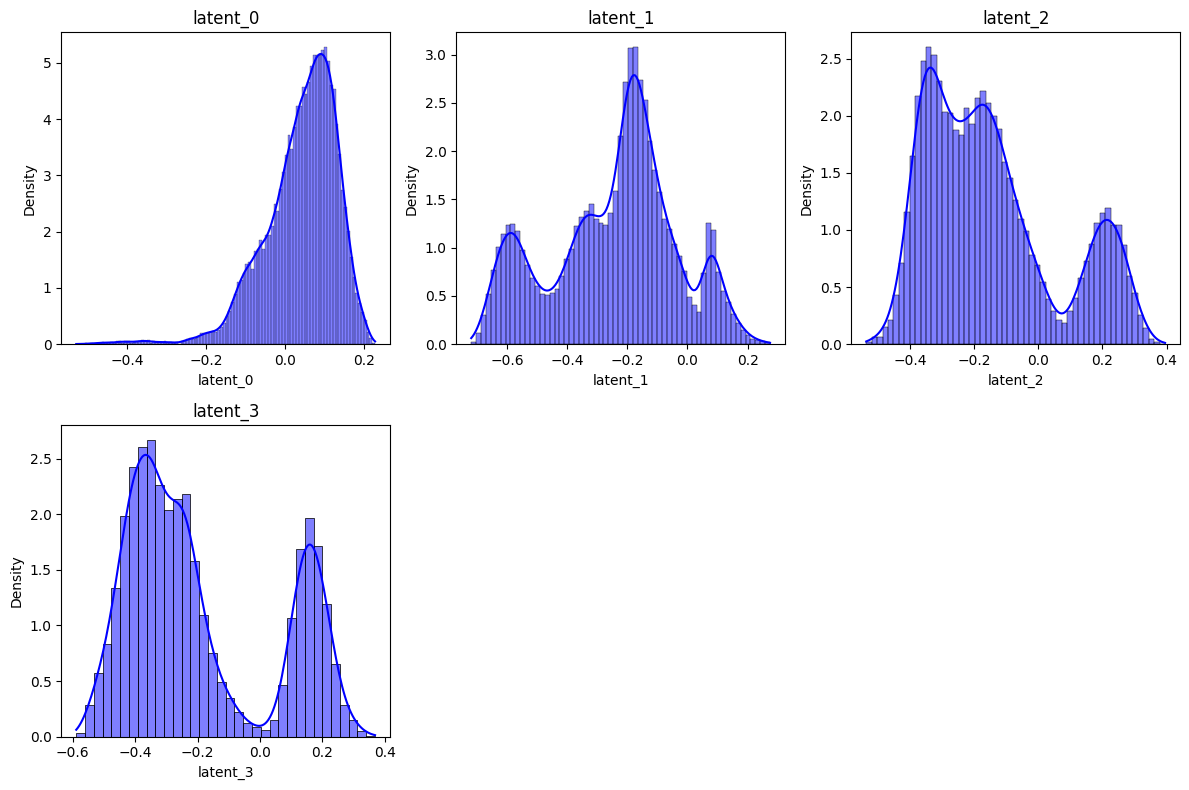

In [119]:
col_plotter(latent_rep)

In [120]:
scaler = MinMaxScaler()
latent_rep_scaled = pd.DataFrame(scaler.fit_transform(latent_rep), columns=latent_rep.columns, index=latent_rep.index)
latent_rep_scaled_outliers = pd.DataFrame(scaler.transform(latent_rep_outliers), columns=latent_rep.columns, index=latent_rep_outliers.index)

**Outliers Separated**

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kme

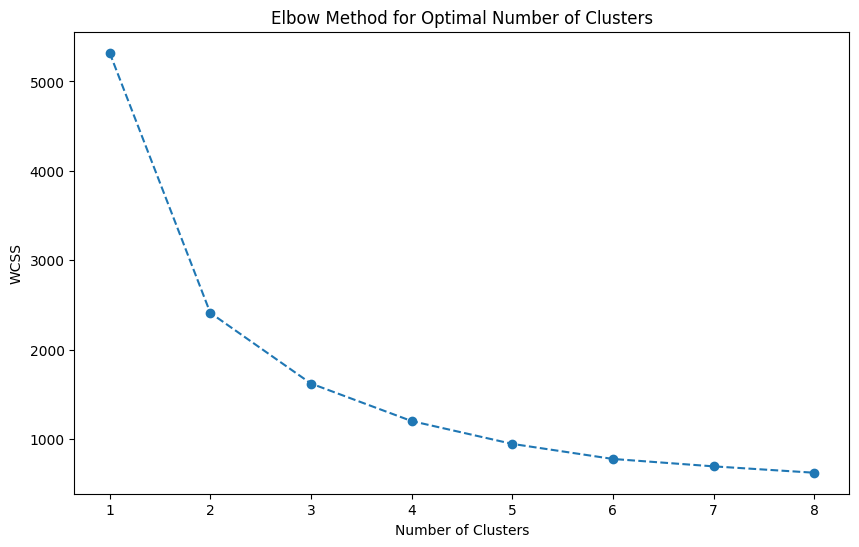

In [121]:
plot_elbow_method(latent_rep_scaled, max_clusters=8)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kme

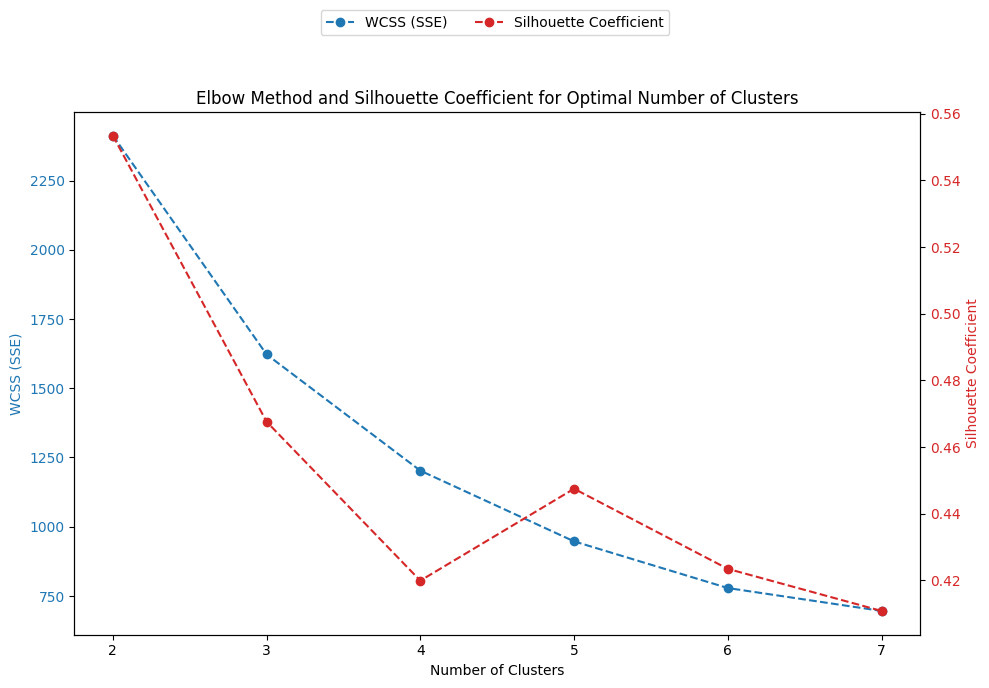

([2412.4577602908903,
  1622.1752029456825,
  1202.4729422476646,
  947.1334318260172,
  778.6248765811945,
  695.8658490874027],
 [0.5534488932670333,
  0.4676202122379906,
  0.41994354794010397,
  0.4475120102256088,
  0.42348458912793085,
  0.4108572852472836])

In [122]:
plot_elbow_and_silhouette(latent_rep_scaled, max_clusters=7)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


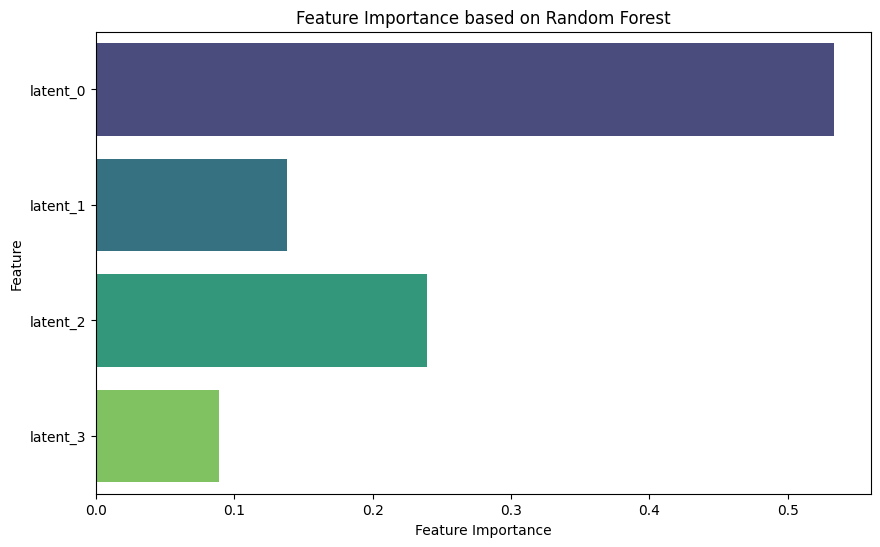

In [96]:
plot_feature_importance(latent_rep_scaled, n_clusters=5)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kme

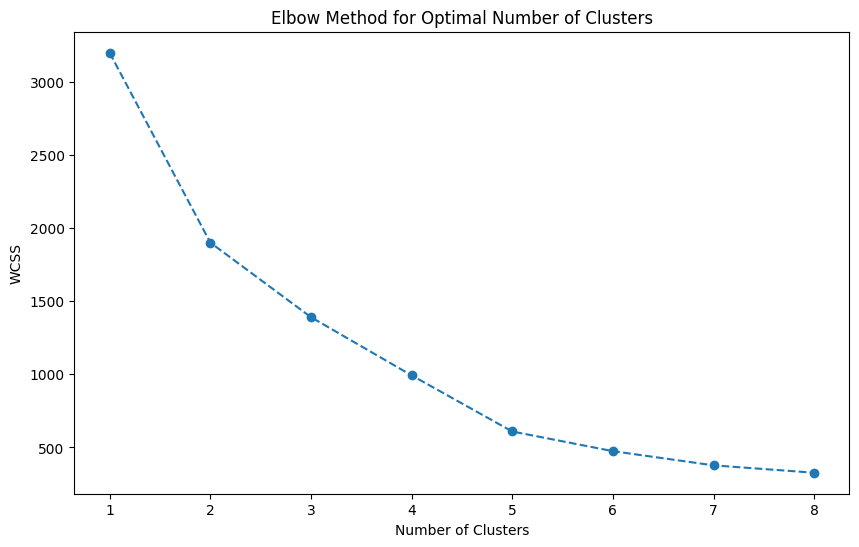

In [123]:
plot_elbow_method(latent_rep_scaled_outliers, max_clusters=8)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kme

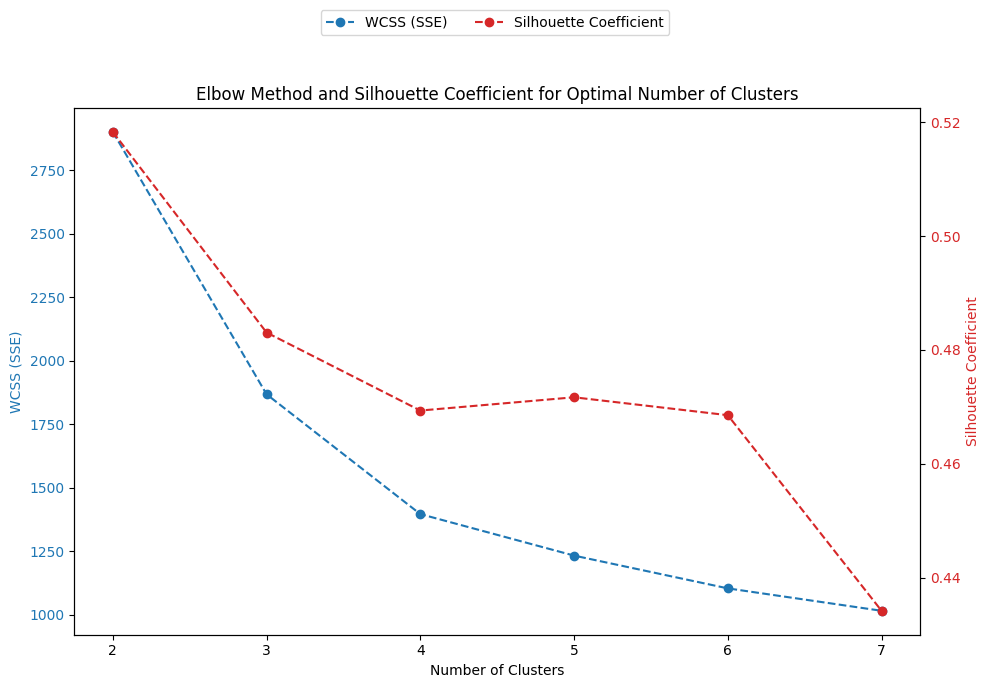

([2900.5817392043473,
  1867.8859336593148,
  1396.3594979877614,
  1232.9854500414735,
  1103.9642939991552,
  1015.7754083813466],
 [0.5182708785221654,
  0.4830337228091635,
  0.4693304418309958,
  0.4716609368164106,
  0.4685172309109314,
  0.4341581996503222])

In [63]:
plot_elbow_and_silhouette(latent_rep_scaled_outliers, max_clusters=7)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


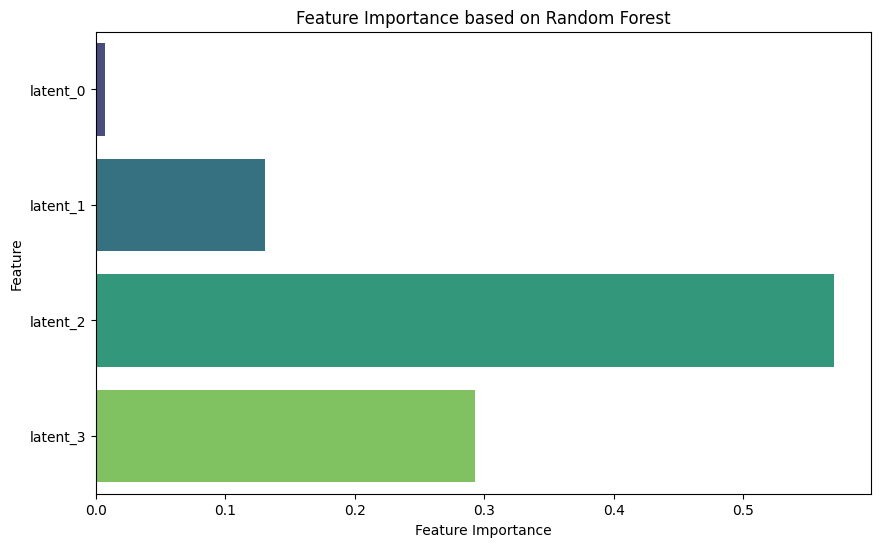

In [ ]:
plot_feature_importance(latent_rep_scaled_outliers, n_clusters=3)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


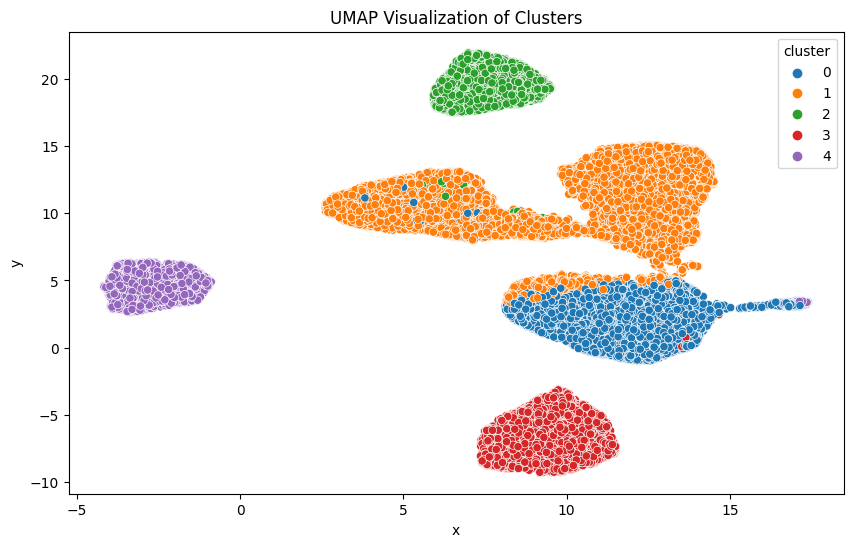

In [124]:
latent_rep_scaled_labeled, kmeans_non_outliers = append_kmeans_clusters(latent_rep_scaled, n_clusters=5)
centroids_non_outliers = kmeans_non_outliers.cluster_centers_
plot_umap_clusters(latent_rep_scaled_labeled)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


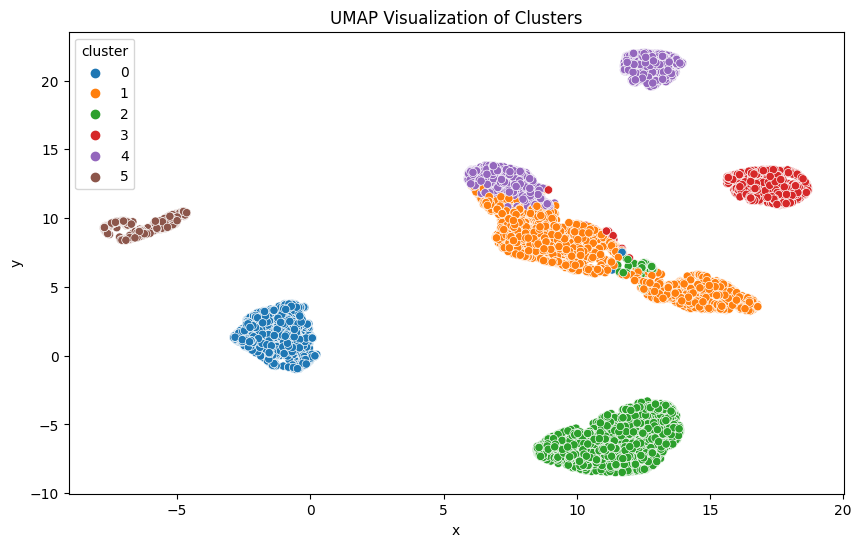

In [125]:
latent_rep_scaled_labeled_outliers, kmeans_outliers = append_kmeans_clusters(latent_rep_scaled_outliers, n_clusters=6)
centroids_outliers = kmeans_outliers.cluster_centers_
plot_umap_clusters(latent_rep_scaled_labeled_outliers)

**Concat**

In [132]:
merge_decisions, nearest_clusters = evaluate_and_merge_outliers(latent_rep_scaled_labeled_outliers.drop(columns=['cluster']), centroids_non_outliers, threshold=0.5)

latent_df_outliers = update_cluster_labels(latent_rep_scaled_labeled_outliers, merge_decisions, nearest_clusters, n_clusters_non_outliers=7)

combined_latent_df = pd.concat([latent_rep_scaled_labeled, latent_df_outliers], ignore_index=True)
combined_latent_df.head()

,latent_0,latent_1,latent_2,latent_3,cluster
0,0.811783,0.804156,0.140518,0.401171,2
1,0.847032,0.594852,0.338304,0.088942,1
2,0.837884,0.667601,0.228861,0.652608,4
3,0.657383,0.381686,0.473655,0.297117,0
4,0.743578,0.573815,0.178513,0.195557,1


c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


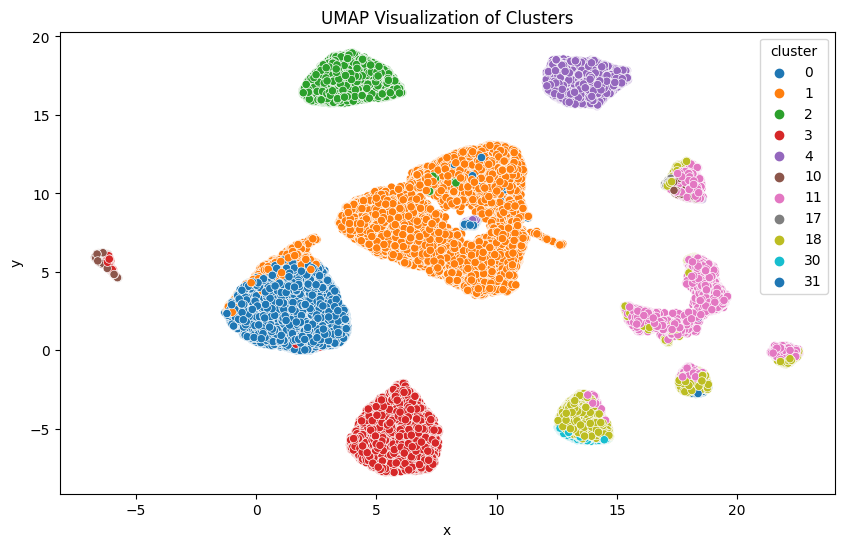

In [133]:
plot_umap_clusters(combined_latent_df)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


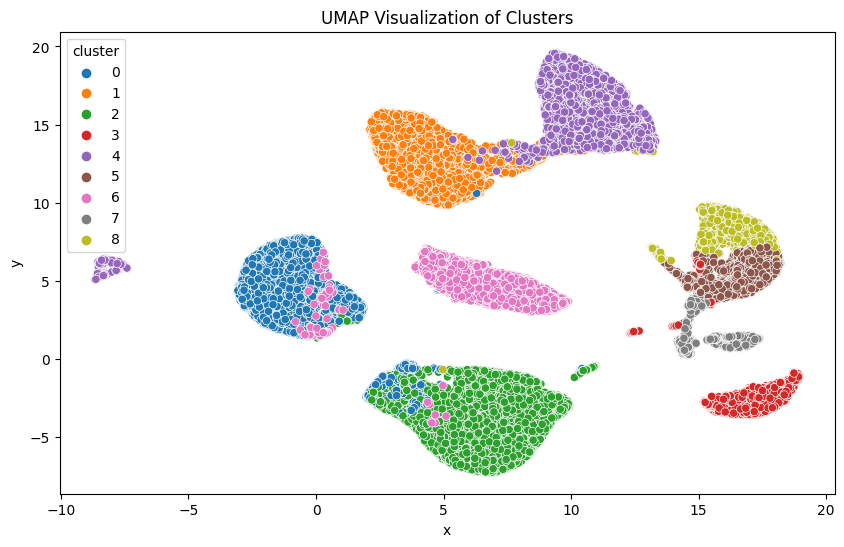

In [103]:
concat_latent_rep = adjust_and_concat_clusters(latent_rep_scaled_labeled, latent_rep_scaled_labeled_outliers)
plot_umap_clusters(concat_latent_rep)

**With Outliers**

In [140]:
latent_rep_path = os.path.join(base_dir, 'latent_representation_withoutliers.csv')
latent_rep = pd.read_csv(latent_rep_path, index_col='customer_id')

scaler = MinMaxScaler()
latent_rep_scaled = pd.DataFrame(scaler.fit_transform(latent_rep), columns=latent_rep.columns, index=latent_rep.index)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


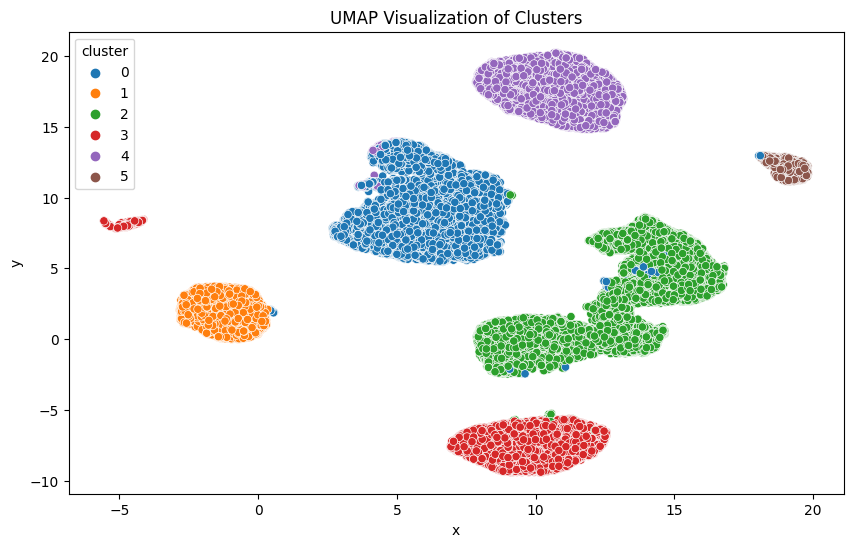

In [142]:
withoutliers, kmeans = append_kmeans_clusters(latent_rep_scaled, n_clusters=6)
plot_umap_clusters(withoutliers)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


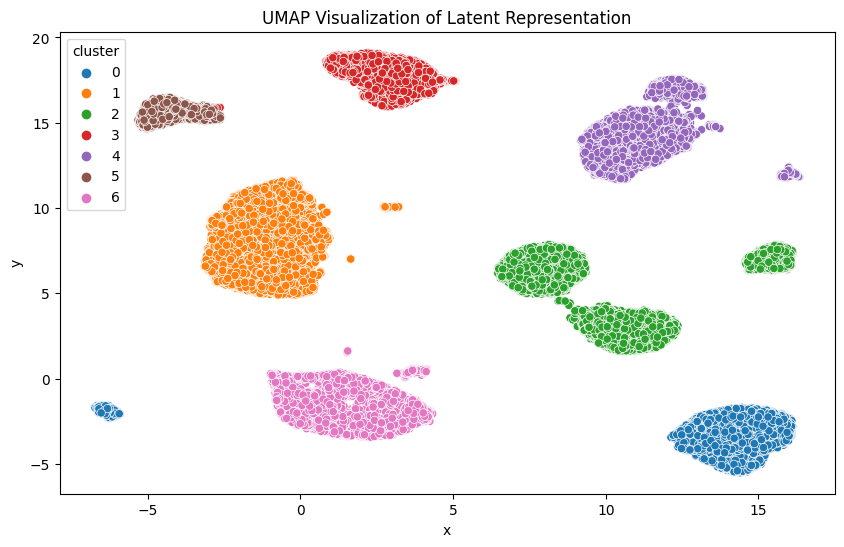

,x,y,cluster
0,14.941543,-2.776446,0
1,12.329451,17.209211,4
2,9.208262,6.711281,2
3,1.568414,1.642802,6
4,-4.595405,16.231741,5
...,...,...,...
43626,14.563020,-3.052151,0
43627,13.891803,-4.341884,0
43628,3.383058,16.842127,3
43629,-0.118683,-2.018278,6


In [39]:
kmeans_umap_visualization(latent_rep_scaled, n_clusters=7) 

com outliers, latent_dim = 6, RobustScaler()

# **Without Using Autoencoder**

In [27]:
customer_info_noencode = pd.read_csv(os.path.join(base_dir, 'customer_info_preproc.csv'), index_col='customer_id')
customer_info_noencode_outliers = pd.read_csv(os.path.join(base_dir, 'customer_info_preproc_outliers.csv'), index_col='customer_id')

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


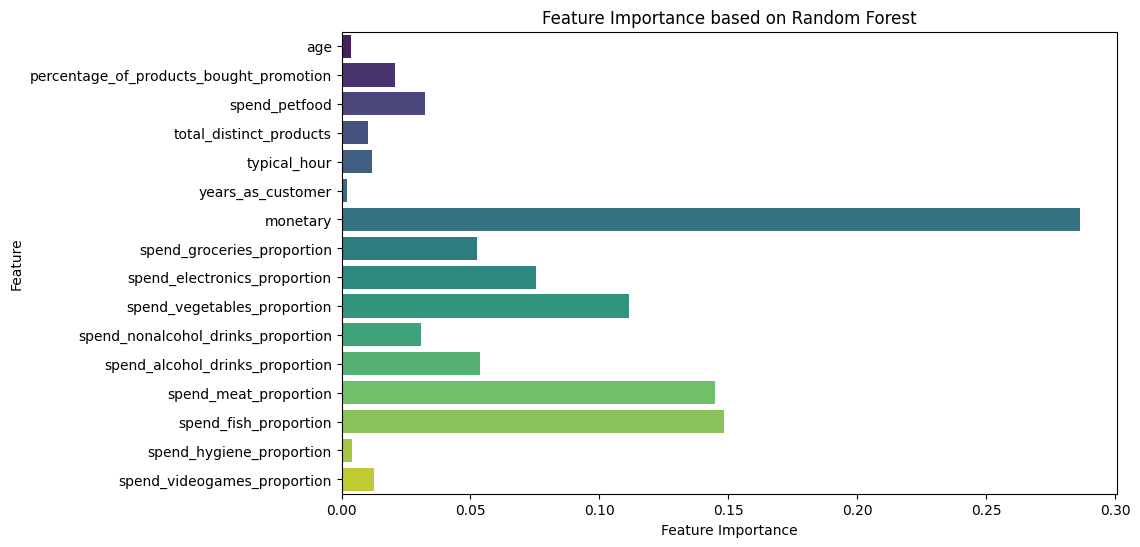

In [29]:
plot_feature_importance(customer_info_noencode, n_clusters=3)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


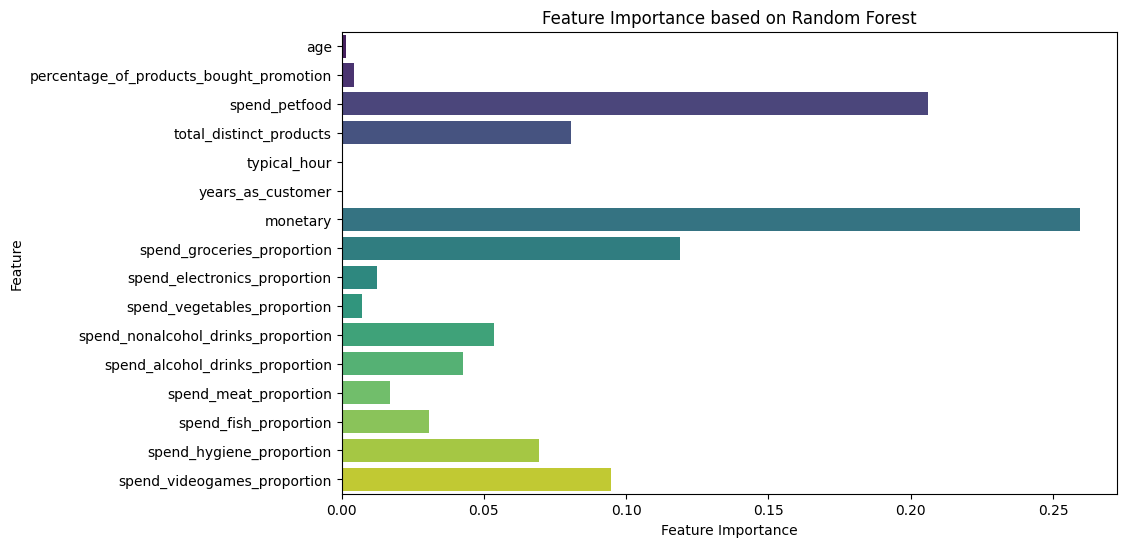

In [30]:
plot_feature_importance(customer_info_noencode_outliers, n_clusters=3)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


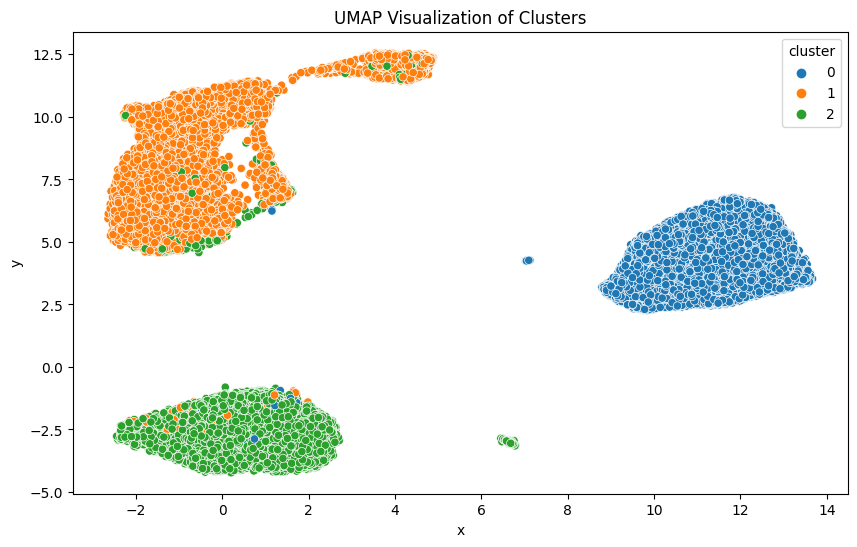

In [31]:
customer_info_noencode_labeled = append_kmeans_clusters(customer_info_noencode, n_clusters=3)
plot_umap_clusters(customer_info_noencode_labeled)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


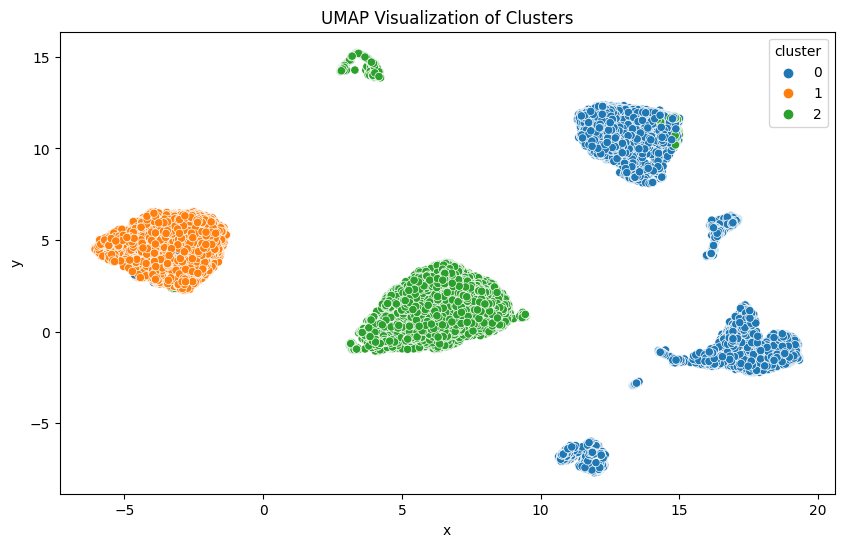

In [32]:
customer_info_noencode_labeled_outliers = append_kmeans_clusters(customer_info_noencode_outliers, n_clusters=3)
plot_umap_clusters(customer_info_noencode_labeled_outliers)